## Libraries

In [5]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

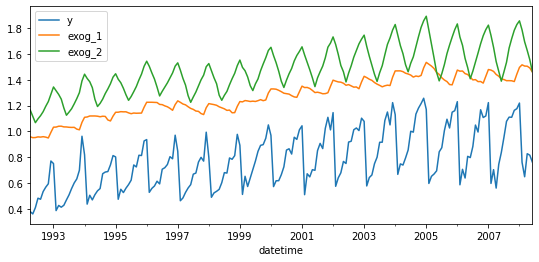

In [6]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o_exog.csv')
data = pd.read_csv(url, sep=',', header=0, names=['datetime', 'y', 'exog_1', 'exog_2'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data.sort_index()

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data.plot(ax=ax);

In [7]:
# Split train-test
# ==============================================================================
steps = 36
data_train = data.iloc[:-steps, :]
data_test  = data.iloc[-steps:, :]

In [8]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=123),
                 lags      = 5
             )

forecaster.fit(
    y    = data_train['y'],
    exog = data_train[['exog_1', 'exog_2']]
)

forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5] 
Transformer for y: None 
Transformer for exog: None 
Window size: 5 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['exog_1', 'exog_2'] 
Training range: [Timestamp('1992-04-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-03-09 12:45:55 
Last fit date: 2023-03-09 12:45:55 
Skforecast version: 0.6.0 
Python version: 

In [9]:
# Predict
# ==============================================================================
steps = 3
predictions = forecaster.predict(
                  steps = steps,
                  exog = data_test[['exog_1', 'exog_2']]
              )
# Add datetime index to predictions
predictions.head(3)

2005-07-01    0.863225
2005-08-01    0.941427
2005-09-01    1.033145
Freq: MS, Name: pred, dtype: float64

In [10]:
# Save model
save_forecaster(forecaster, file_name='forecaster.py', verbose=False)

In [11]:
# Load model
forecaster_loaded = load_forecaster('forecaster.py', verbose=False)

In [12]:
# Predict
forecaster_loaded.predict(
    steps = steps,
    exog = data_test[['exog_1', 'exog_2']]
).iloc[-1]

1.0331447865000003

In [43]:
forecaster_loaded.last_window

datetime
2005-02-01    0.597639
2005-03-01    0.652590
2005-04-01    0.670505
2005-05-01    0.695248
2005-06-01    0.842263
Freq: MS, Name: y, dtype: float64

In [ ]:
{"pred":{"2005-07-01T00:00:00":0.8632251798,
         "2005-08-01T00:00:00":0.9414265285000005,
         "2005-09-01T00:00:00":1.0331447865000003}}

In [ ]:
{"y":{"1107216000000":0.597639,
      "1109635200000":0.65259,
      "1112313600000":0.670505,
      "1114905600000":0.695248,
      "1117584000000":0.842263}}

In [81]:
forecaster_loaded.last_window.to_frame().to_json('last_window.json', date_format='iso')

In [108]:
lw = pd.read_json('last_window.json')
lw = lw['y']
lw = lw.asfreq('MS')
lw

2005-02-01    0.597639
2005-03-01    0.652590
2005-04-01    0.670505
2005-05-01    0.695248
2005-06-01    0.842263
Freq: MS, Name: y, dtype: float64

In [37]:
forecaster_loaded.predict(
    steps = steps,
    last_window = lw,
    exog = data_test[['exog_1', 'exog_2']]
)

2005-07-01    0.863225
2005-08-01    0.941427
2005-09-01    1.033145
Freq: MS, Name: pred, dtype: float64

In [48]:
data_test['exog_1'].to_numpy()

array([1.4157557 , 1.3983043 , 1.3861742 , 1.3631547 , 1.3610089 ,
       1.4173162 , 1.4751263 , 1.4667893 , 1.4679604 , 1.4476982 ,
       1.4410051 , 1.4201524 , 1.39911   , 1.4013705 , 1.3860182 ,
       1.3867723 , 1.374507  , 1.4277988 , 1.4794348 , 1.475246  ,
       1.4649453 , 1.4413243 , 1.4274189 , 1.4062475 , 1.402091  ,
       1.39308765, 1.39338201, 1.39237462, 1.38639615, 1.44427975,
       1.49583405, 1.51584025, 1.50625795, 1.50525325, 1.49146435,
       1.45985611])

In [49]:
data_test['exog_2'].to_numpy()

array([1.4469884 , 1.5177698 , 1.602616  , 1.668975  , 1.7303688 ,
       1.787644  , 1.8324828 , 1.7309626 , 1.6669458 , 1.5650276 ,
       1.4943662 , 1.407822  , 1.4672574 , 1.5357952 , 1.6070088 ,
       1.6791784 , 1.741192  , 1.7883402 , 1.8230744 , 1.7434832 ,
       1.6507122 , 1.5414566 , 1.4664976 , 1.3894206 , 1.4606988 ,
       1.5354631 , 1.64530742, 1.71825165, 1.78337171, 1.82786071,
       1.85620501, 1.78637309, 1.69426426, 1.6271348 , 1.555068  ,
       1.4635072 ])

In [51]:
data_test.index.to_numpy()

array(['2005-07-01T00:00:00.000000000', '2005-08-01T00:00:00.000000000',
       '2005-09-01T00:00:00.000000000', '2005-10-01T00:00:00.000000000',
       '2005-11-01T00:00:00.000000000', '2005-12-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2006-02-01T00:00:00.000000000',
       '2006-03-01T00:00:00.000000000', '2006-04-01T00:00:00.000000000',
       '2006-05-01T00:00:00.000000000', '2006-06-01T00:00:00.000000000',
       '2006-07-01T00:00:00.000000000', '2006-08-01T00:00:00.000000000',
       '2006-09-01T00:00:00.000000000', '2006-10-01T00:00:00.000000000',
       '2006-11-01T00:00:00.000000000', '2006-12-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000', '2007-04-01T00:00:00.000000000',
       '2007-05-01T00:00:00.000000000', '2007-06-01T00:00:00.000000000',
       '2007-07-01T00:00:00.000000000', '2007-08-01T00:00:00.000000000',
       '2007-09-01T00:00:00.000000000', '2007-10-01

In [2]:
from fastapi import FastAPI, Request
import pandas as pd
from skforecast.utils import load_forecaster
from google.cloud import bigquery as bq
from google.oauth2 import service_account

# Read BQ
client = bq.Client()

query_exog_test = """
SELECT *
FROM `ingka-food-analytics-prod.forecast_models.test_javi`
"""
df_exog_test = client.query(query_exog_test).result().to_dataframe()
df_exog_test = df_exog_test.set_index('idx')
df_exog_test = df_exog_test.asfreq('MS')
df_exog_test

,exog_1,exog_2
idx,,
2005-07-01,1.415756,1.446988
2005-08-01,1.398304,1.517770
2005-09-01,1.386174,1.602616
2005-10-01,1.363155,1.668975
2005-11-01,1.361009,1.730369
2005-12-01,1.417316,1.787644
2006-01-01,1.475126,1.832483
2006-02-01,1.466789,1.730963
2006-03-01,1.467960,1.666946


In [48]:
# ==============================================================================
steps = 3
predictions = forecaster.predict(
                  steps = steps,
                  exog = data_test[['exog_1', 'exog_2']]
              )

predictions.head(3)

2005-07-01    0.863225
2005-08-01    0.941427
2005-09-01    1.033145
Freq: MS, Name: pred, dtype: float64

In [106]:
import json
import requests

url='http://127.0.0.1:8000/make_preds/'

query = {"y":{"2005-02-01T00:00:00.000":0.597639,
              "2005-03-01T00:00:00.000":0.65259,
              "2005-04-01T00:00:00.000":0.670505,
              "2005-05-01T00:00:00.000":0.695248,
              "2005-06-01T00:00:00.000":0.842263}}

# Llamar API
response = requests.post(url, json=query)
response

<Response [200]>

In [107]:
parse_json = json.loads(response.text)
parse_json

{'pred': {'2005-07-01T00:00:00': 0.8791672685,
  '2005-08-01T00:00:00': 0.7310504436,
  '2005-09-01T00:00:00': 0.8883305727000006}}

In [109]:
url='http://127.0.0.1:8000/make_preds/'

response = requests.post(url)
parse_json = json.loads(response.text)
parse_json

{'pred': {'2005-07-01T00:00:00': 0.8632251798,
  '2005-08-01T00:00:00': 0.9414265285000005,
  '2005-09-01T00:00:00': 1.0331447865000003}}

In [110]:
url='http://127.0.0.1:8000/make_preds_fast/'

response = requests.post(url)
parse_json = json.loads(response.text)
parse_json

{'pred': {'2005-07-01T00:00:00': 0.8632251798,
  '2005-08-01T00:00:00': 0.9414265285000005,
  '2005-09-01T00:00:00': 1.0331447865000003}}